In [1]:
import wooldridge

In [2]:
df = wooldridge.data('mroz')

# Teoria - Modelo de Regressão Linear (Linear Regression Model LRM)

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


In [5]:
df.shape

(753, 22)

In [6]:
df = df.dropna()

In [7]:
df.columns.tolist()

['inlf',
 'hours',
 'kidslt6',
 'kidsge6',
 'age',
 'educ',
 'wage',
 'repwage',
 'hushrs',
 'husage',
 'huseduc',
 'huswage',
 'faminc',
 'mtr',
 'motheduc',
 'fatheduc',
 'unem',
 'city',
 'exper',
 'nwifeinc',
 'lwage',
 'expersq']

In [8]:
import statsmodels.api as sm

In [9]:
y = df['lwage']
x = df['educ']

In [10]:
x = sm.add_constant(data=x)

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
ols_regression = sm.OLS(endog=y, exog=x).fit()

In [12]:
ols_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     56.93
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.76e-13
Time:                        12:45:54   Log-Likelihood:                -441.26
No. Observations:                 428   AIC:                             886.5
Df Residuals:                     426   BIC:                             894.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1852      0.185     -1.000      0.318      -0.549       0.179
educ           0.1086      0.014      7.545      0.000       0.080       0.137
==============================================================================
Omnibus:                       91.833   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.790
Skew:                          -0.956   Prob(JB):                     1.08e-66
Kurtosis:                       6.658   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y_fitted = ols_regression.fittedvalues

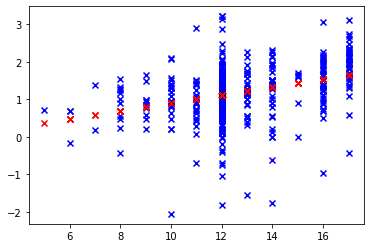

In [14]:
plt.scatter(x['educ'],y, c='b', marker='x', label='Original Values')
plt.scatter(x['educ'], y_fitted, c='r', marker='x', label='Fitted Values')
plt.show()

In [15]:
ols_regression.resid

0      0.091567
1     -0.790075
2      0.395551
3     -1.026464
4      0.188388
         ...   
423   -0.063263
424    0.550270
425    0.542193
426    0.107861
427    0.287902
Length: 428, dtype: float64

In [16]:
round(sum(ols_regression.resid),5)

0.0

In [17]:
ols_regression.ssr

197.0010216102181

In [18]:
ols_regression.ess

26.32641928189122

In [19]:
ols_regression.centered_tss

223.3274408921093

In [20]:
ols_regression.ssr+ols_regression.ess

223.3274408921093

In [21]:
import scipy.stats as st

In [22]:
st.norm.cdf(9)

1.0

# Variáveis Aleatórias (Utilizados também para se adquirir valores de distribuições)

In [23]:
import sympy as sp
from sympy.plotting import plot

In [24]:
sp.pi

pi

In [25]:
x = sp.symbols('x')
func = 1/sp.sqrt(2*sp.pi)*sp.exp((-x**2)/2)
func

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

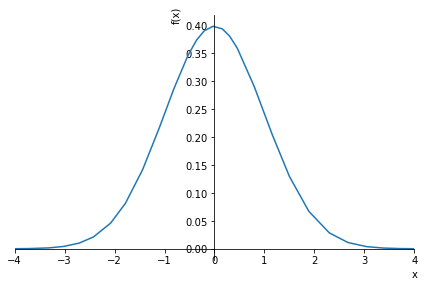

In [26]:
p1 = plot(func, show=True, xlim=(-4, 4))

In [27]:
st.norm.ppf(0.05)

-1.6448536269514729

In [28]:
st.norm.rvs()

0.931937956600296

In [29]:
# yi = B1+B2xi+ei

In [30]:
import numpy as np

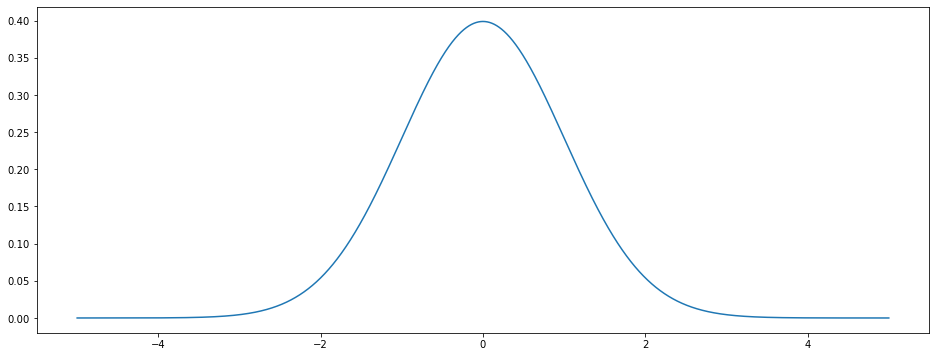

In [31]:
x = np.linspace(-5, 5, 10000)
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, st.norm.pdf(x, 0, 1))
plt.show()

In [32]:
#Era isso q eu queria
x_rvs = st.norm.rvs(loc=0, scale=1, size=10000)

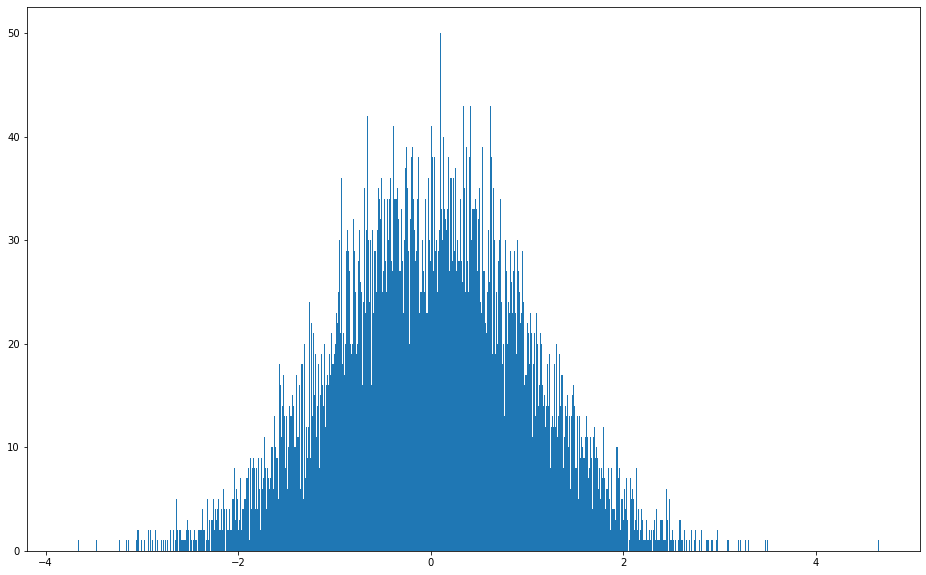

In [33]:


fig, ax = plt.subplots(figsize=(16,10))
ax.hist(x_rvs,bins=1000)
plt.show()

In [34]:
counts = np.random.normal(loc=0, scale=1, size=10000)


<function matplotlib.pyplot.show(close=None, block=None)>

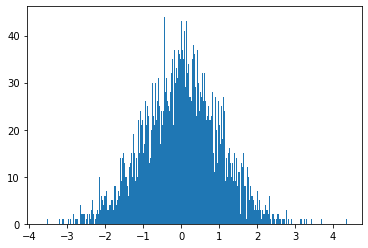

In [35]:
plt.hist(counts, bins=1000)
plt.show

# Teste de Chow : A Chow test is used to test whether the coefficients in two different regression models on different datasets are equal.

In [36]:
# Teste de Chow :
# A Chow test is used to test whether the coefficients in two different regression models on different datasets are equal.
import pandas as pd
df = pd.DataFrame({'x': [1, 1, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 10, 10,
                         11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20],
                   'y': [3, 5, 6, 10, 13, 15, 17, 14, 20, 23, 25, 27, 30, 30, 31,
                         33, 32, 32, 30, 32, 34, 34, 37, 35, 34, 36, 34, 37, 38, 36]})

In [37]:
df.head()

,x,y
0,1,3
1,1,5
2,2,6
3,3,10
4,4,13


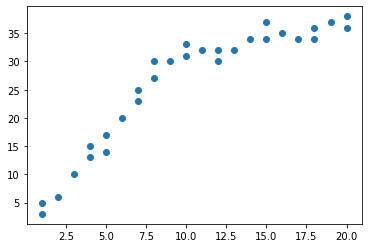

In [38]:
plt.plot(df.x, df.y, 'o')

In [39]:
import chow_test
chow_test.chow_test(X_series=df[['x']],y_series=df['y'],last_index=15,first_index=16,significance=.05)


Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 113.81778458845861, P_value: 2.773337115513641e-13


(113.81778458845861, 2.773337115513641e-13)

# Teste de White e Correção Robusta de White

In [40]:
# Correção robusta de white para erros padrões

# White’s test is used to determine if heteroscedasticity is present in a regression model.

# Heteroscedasticity refers to the unequal scatter of residuals at different levels of a 
# response variable, which violates the assumption that the residuals are equally scattered at 
# each level of the response variable.
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"
data = pd.read_csv(url)

In [41]:
y = data['mpg']

In [42]:
x = data[['disp', 'hp']]

In [43]:
x = sm.add_constant(data=x)

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
ols_regression = sm.OLS(endog=y, exog=x).fit()
ols_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     43.09
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.06e-09
Time:                        12:46:09   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7359      1.332     23.083      0.000      28.013      33.459
disp          -0.0303      0.007     -4.098      0.000      -0.045      -0.015
hp            -0.0248      0.013     -1.856      0.074      -0.052       0.003
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import statsmodels.stats.diagnostic as smd

In [46]:
white_test = smd.het_white(ols_regression.resid, ols_regression.model.exog)
white_test

(7.0766203304166915,
 0.21500404394263434,
 1.4764621093132035,
 0.23147065943879158)

In [47]:
# a função não vem com as labels (por algum motivo) então por isso tem essa variável aqui, pra ficar legível
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 7.0766203304166915, 'Test Statistic p-value': 0.21500404394263434, 'F-Statistic': 1.4764621093132035, 'F-Test p-value': 0.23147065943879158}


Temos como hipótese nula a homocedasticidade, e hipótese alternativa a heterocedasticidade. Nesse caso, o p-valor foi de 0.21, ou seja, não rejeitamos hipótese nula de homocedasticidade. Supondo que a rejeitassemos, poderiamos fazer a correção robusta de white da maneira a seguir.

In [48]:
ols_regression_white = sm.OLS(endog=y, exog=x).fit(cov_type='HC3')
ols_regression_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     34.62
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.07e-08
Time:                        12:46:09   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7359      1.593     19.293      0.000      27.613      33.858
disp          -0.0303      0.008     -3.817      0.000      -0.046      -0.015
hp            -0.0248      0.013     -1.881      0.060      -0.051       0.001
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

# Teste de Breusch-Pagan-Godfrey para identificação de heterocedasticidade

In [49]:
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [50]:
y = df['rating']
x = sm.add_constant(df[['points', 'assists', 'rebounds']])

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
ols_regression = sm.OLS(endog=y, exog=x).fit()
ols_regression.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Wed, 18 May 2022   Prob (F-statistic):             0.0995
Time:                        12:46:09   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4716     14.588      4.282      0.005      26.776      98.168
points         1.1193      0.411      2.724      0.034       0.114       2.125
assists        0.8834      1.381      0.640      0.546      -2.495       4.262
rebounds      -0.4278      0.851     -0.503      0.633      -2.510       1.655
==============================================================================
Omnibus:                        2.711   Durbin-Watson:                   2.392
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                0.945
Skew:                          -0.751   Prob(JB):                        0.624
Kurtosis:                       3.115   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
BP_test = smd.het_breuschpagan(ols_regression.resid, ols_regression.model.exog)

In [53]:
print(dict(zip(names, BP_test)))

{'Lagrange multiplier statistic': 6.003951995818753, 'p-value': 0.11141811013398045, 'f-value': 3.004944880310017, 'f p-value': 0.11663863538252693}


The null hypothesis (H0): Homoscedasticity is present.

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In this example, the Lagrange multiplier statistic for the test is 6.004 and the corresponding p-value is 0.1114. Because this p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

# WLS (Weighted Leasts Squares) utilizado para tratamento de heterocedasticidade

A teoria por detrás de WLS é um pouco complexa e sua aplicabilidade é situacional, por isso a ausência de exemplos concretos aqui.

# Erros de Medição (Measurement Errors)